In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.tokenize import word_tokenize 

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('/content/drive/My Drive/Projects/GOT/got_scripts_breakdown.csv', delimiter=';')
df.head()

,Column1,Season,Episode,Sentence,Name,N_serie,N_Season,Emision Date
0,1,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011
1,2,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011
2,3,Season 1,winter is coming,How close did you get?,waymar royce,1,1,17/04/2011
3,4,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011
4,5,Season 1,winter is coming,We should head back to the wall,gared,1,1,17/04/2011


In [4]:
df = df[['Sentence']]
df.columns = ['Text']
df = df.iloc[:3000]
df.head()

,Text
0,What d’you expect? They’re savages One lot ste...
1,I’ve never seen wildlings do a thing like this...
2,How close did you get?
3,Close as any man would
4,We should head back to the wall


In [5]:
df.shape

(3000, 1)

In [6]:
def preprocess(text):
  text = text.lower()
  text = re.sub('[^a-z ]', ' ', text)
  text = text + ' endseq'
  text = ' '.join(text.split())
  return text

In [7]:
df['Text'] = df['Text'].apply(preprocess)
df.head()

,Text
0,what d you expect they re savages one lot stea...
1,i ve never seen wildlings do a thing like this...
2,how close did you get endseq
3,close as any man would endseq
4,we should head back to the wall endseq


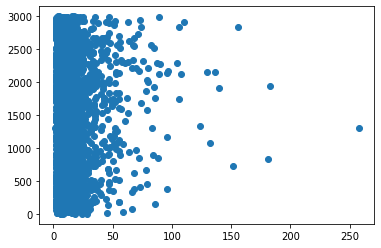

In [8]:
sen_length = [len(x) for x in df.Text.str.split()]
plt.scatter(sen_length, [i for i in range(len(sen_length))])
plt.show()

In [9]:
df = df[np.array(sen_length) <= 200]
df.reset_index(inplace = True)
df.shape

(2999, 2)

In [10]:
vocab = []

for i in df.Text:
  vocab.append(word_tokenize(i))

In [11]:
vocab_flat = []

for sublist in vocab:
    for item in sublist:
        vocab_flat.append(item)

print('Total words:', len(vocab_flat), '| Unique words:', len(set(vocab_flat)))

Total words: 41923 | Unique words: 3658


In [12]:
max_sentence = max([len(x) for x in vocab])
max_sentence

183